In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

In [2]:
# Here We Convert Minutely Data to Daily Form 

def dateparse (time_in_secs):    
    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

In [3]:
df = pd.read_csv("../BTC_Correction_Listing_csv/data.csv",parse_dates=[0], date_parser=dateparse) 

In [4]:
df.isnull().sum()

Timestamp                  0
Open                 1243472
High                 1243472
Low                  1243472
Close                1243472
Volume_(BTC)         1243472
Volume_(Currency)    1243472
Weighted_Price       1243472
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['Timestamp'], format="%Y-%d-%m %H:%M")

In [6]:
df['date'] = pd.to_datetime(df['date'])
df         = df.set_index(['date'])

In [7]:
df.Low[df.Low==1.5]     = 540   # wrong data 
df.Close[df.Close==1.5] = 540   # wrong data
df.fillna(method='ffill', inplace = True)

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Close 

df_Close = df[["Close"]]
df_Close = df_Close.resample('D')[['Close']].last()

In [9]:
# Low 

df_Low = df[["Low"]]
df_Low = df_Low.resample('D')['Low'].agg(['min'])

In [10]:
# High

df_High = df[["High"]]
df_High = df_High.resample('D')['High'].agg(['max'])

In [11]:
df_daily = pd.concat([df_Low,df_High,df_Close],axis=1)

In [12]:
df_daily

,min,max,Close
date,,,
2011-12-31 00:00:00+00:00,4.39,4.39,4.39
2012-01-01 00:00:00+00:00,4.39,4.58,4.58
2012-01-02 00:00:00+00:00,4.58,5.00,5.00
2012-01-03 00:00:00+00:00,5.00,5.32,5.26
2012-01-04 00:00:00+00:00,4.93,5.29,5.19
...,...,...,...
2020-12-27 00:00:00+00:00,25329.90,28377.94,27295.11
2020-12-28 00:00:00+00:00,25770.00,27473.49,27261.43
2020-12-29 00:00:00+00:00,25831.85,27292.82,26626.63


In [13]:
from stockstats import StockDataFrame

In [14]:
df_daily = StockDataFrame.retype(df_daily)
df_daily['macd'] = df_daily.get('macd') # calculate MACD

In [15]:
df_daily

,min,max,close,macd,macds,macdh
date,,,,,,
2011-12-31 00:00:00+00:00,4.39,4.39,4.39,0.000000,0.000000,0.000000
2012-01-01 00:00:00+00:00,4.39,4.58,4.58,0.004263,0.002368,0.001895
2012-01-02 00:00:00+00:00,4.58,5.00,5.00,0.018456,0.008962,0.009494
2012-01-03 00:00:00+00:00,5.00,5.32,5.26,0.033846,0.017391,0.016455
2012-01-04 00:00:00+00:00,4.93,5.29,5.19,0.038711,0.023733,0.014977
...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,25329.90,28377.94,27295.11,1902.250091,1515.660264,386.589826
2020-12-28 00:00:00+00:00,25770.00,27473.49,27261.43,2052.525766,1623.033365,429.492401
2020-12-29 00:00:00+00:00,25831.85,27292.82,26626.63,2096.233195,1717.673331,378.559864


In [16]:
buying = []
selling = []

i = 0

for x in range(len(df_daily)-2):
    
        nextDayDate  = df_daily.index[1 + i]
        nextDayMacd = df_daily.iloc[1 + i]
        nextDayMacds = df_daily.iloc[1 + i]
        print(nextDayDate)    
        
        if(df_daily["macd"].iloc[i+1] < df_daily["macds"].iloc[i+1]):
            if(df_daily["macd"].iloc[i+2] > df_daily["macds"].iloc[i+2]):
                #print("we need make buying here")
                buying.append([df_daily.index[i+1],  df_daily["close"].iloc[i+2]])
                
        if(df_daily["macd"].iloc[i+1] > df_daily["macds"].iloc[i+1]):
            if(df_daily["macd"].iloc[i+2] < df_daily["macds"].iloc[i+2]):
                #print("we need to make selling here")
                selling.append([df_daily.index[i+1],  df_daily["close"].iloc[i+2]])
                
                
        
        i = i+1 

2012-01-01 00:00:00+00:00
2012-01-02 00:00:00+00:00
2012-01-03 00:00:00+00:00
2012-01-04 00:00:00+00:00
2012-01-05 00:00:00+00:00
2012-01-06 00:00:00+00:00
2012-01-07 00:00:00+00:00
2012-01-08 00:00:00+00:00
2012-01-09 00:00:00+00:00
2012-01-10 00:00:00+00:00
2012-01-11 00:00:00+00:00
2012-01-12 00:00:00+00:00
2012-01-13 00:00:00+00:00
2012-01-14 00:00:00+00:00
2012-01-15 00:00:00+00:00
2012-01-16 00:00:00+00:00
2012-01-17 00:00:00+00:00
2012-01-18 00:00:00+00:00
2012-01-19 00:00:00+00:00
2012-01-20 00:00:00+00:00
2012-01-21 00:00:00+00:00
2012-01-22 00:00:00+00:00
2012-01-23 00:00:00+00:00
2012-01-24 00:00:00+00:00
2012-01-25 00:00:00+00:00
2012-01-26 00:00:00+00:00
2012-01-27 00:00:00+00:00
2012-01-28 00:00:00+00:00
2012-01-29 00:00:00+00:00
2012-01-30 00:00:00+00:00
2012-01-31 00:00:00+00:00
2012-02-01 00:00:00+00:00
2012-02-02 00:00:00+00:00
2012-02-03 00:00:00+00:00
2012-02-04 00:00:00+00:00
2012-02-05 00:00:00+00:00
2012-02-06 00:00:00+00:00
2012-02-07 00:00:00+00:00
2012-02-08 0

2013-08-23 00:00:00+00:00
2013-08-24 00:00:00+00:00
2013-08-25 00:00:00+00:00
2013-08-26 00:00:00+00:00
2013-08-27 00:00:00+00:00
2013-08-28 00:00:00+00:00
2013-08-29 00:00:00+00:00
2013-08-30 00:00:00+00:00
2013-08-31 00:00:00+00:00
2013-09-01 00:00:00+00:00
2013-09-02 00:00:00+00:00
2013-09-03 00:00:00+00:00
2013-09-04 00:00:00+00:00
2013-09-05 00:00:00+00:00
2013-09-06 00:00:00+00:00
2013-09-07 00:00:00+00:00
2013-09-08 00:00:00+00:00
2013-09-09 00:00:00+00:00
2013-09-10 00:00:00+00:00
2013-09-11 00:00:00+00:00
2013-09-12 00:00:00+00:00
2013-09-13 00:00:00+00:00
2013-09-14 00:00:00+00:00
2013-09-15 00:00:00+00:00
2013-09-16 00:00:00+00:00
2013-09-17 00:00:00+00:00
2013-09-18 00:00:00+00:00
2013-09-19 00:00:00+00:00
2013-09-20 00:00:00+00:00
2013-09-21 00:00:00+00:00
2013-09-22 00:00:00+00:00
2013-09-23 00:00:00+00:00
2013-09-24 00:00:00+00:00
2013-09-25 00:00:00+00:00
2013-09-26 00:00:00+00:00
2013-09-27 00:00:00+00:00
2013-09-28 00:00:00+00:00
2013-09-29 00:00:00+00:00
2013-09-30 0

2015-01-29 00:00:00+00:00
2015-01-30 00:00:00+00:00
2015-01-31 00:00:00+00:00
2015-02-01 00:00:00+00:00
2015-02-02 00:00:00+00:00
2015-02-03 00:00:00+00:00
2015-02-04 00:00:00+00:00
2015-02-05 00:00:00+00:00
2015-02-06 00:00:00+00:00
2015-02-07 00:00:00+00:00
2015-02-08 00:00:00+00:00
2015-02-09 00:00:00+00:00
2015-02-10 00:00:00+00:00
2015-02-11 00:00:00+00:00
2015-02-12 00:00:00+00:00
2015-02-13 00:00:00+00:00
2015-02-14 00:00:00+00:00
2015-02-15 00:00:00+00:00
2015-02-16 00:00:00+00:00
2015-02-17 00:00:00+00:00
2015-02-18 00:00:00+00:00
2015-02-19 00:00:00+00:00
2015-02-20 00:00:00+00:00
2015-02-21 00:00:00+00:00
2015-02-22 00:00:00+00:00
2015-02-23 00:00:00+00:00
2015-02-24 00:00:00+00:00
2015-02-25 00:00:00+00:00
2015-02-26 00:00:00+00:00
2015-02-27 00:00:00+00:00
2015-02-28 00:00:00+00:00
2015-03-01 00:00:00+00:00
2015-03-02 00:00:00+00:00
2015-03-03 00:00:00+00:00
2015-03-04 00:00:00+00:00
2015-03-05 00:00:00+00:00
2015-03-06 00:00:00+00:00
2015-03-07 00:00:00+00:00
2015-03-08 0

2016-07-06 00:00:00+00:00
2016-07-07 00:00:00+00:00
2016-07-08 00:00:00+00:00
2016-07-09 00:00:00+00:00
2016-07-10 00:00:00+00:00
2016-07-11 00:00:00+00:00
2016-07-12 00:00:00+00:00
2016-07-13 00:00:00+00:00
2016-07-14 00:00:00+00:00
2016-07-15 00:00:00+00:00
2016-07-16 00:00:00+00:00
2016-07-17 00:00:00+00:00
2016-07-18 00:00:00+00:00
2016-07-19 00:00:00+00:00
2016-07-20 00:00:00+00:00
2016-07-21 00:00:00+00:00
2016-07-22 00:00:00+00:00
2016-07-23 00:00:00+00:00
2016-07-24 00:00:00+00:00
2016-07-25 00:00:00+00:00
2016-07-26 00:00:00+00:00
2016-07-27 00:00:00+00:00
2016-07-28 00:00:00+00:00
2016-07-29 00:00:00+00:00
2016-07-30 00:00:00+00:00
2016-07-31 00:00:00+00:00
2016-08-01 00:00:00+00:00
2016-08-02 00:00:00+00:00
2016-08-03 00:00:00+00:00
2016-08-04 00:00:00+00:00
2016-08-05 00:00:00+00:00
2016-08-06 00:00:00+00:00
2016-08-07 00:00:00+00:00
2016-08-08 00:00:00+00:00
2016-08-09 00:00:00+00:00
2016-08-10 00:00:00+00:00
2016-08-11 00:00:00+00:00
2016-08-12 00:00:00+00:00
2016-08-13 0

2017-08-22 00:00:00+00:00
2017-08-23 00:00:00+00:00
2017-08-24 00:00:00+00:00
2017-08-25 00:00:00+00:00
2017-08-26 00:00:00+00:00
2017-08-27 00:00:00+00:00
2017-08-28 00:00:00+00:00
2017-08-29 00:00:00+00:00
2017-08-30 00:00:00+00:00
2017-08-31 00:00:00+00:00
2017-09-01 00:00:00+00:00
2017-09-02 00:00:00+00:00
2017-09-03 00:00:00+00:00
2017-09-04 00:00:00+00:00
2017-09-05 00:00:00+00:00
2017-09-06 00:00:00+00:00
2017-09-07 00:00:00+00:00
2017-09-08 00:00:00+00:00
2017-09-09 00:00:00+00:00
2017-09-10 00:00:00+00:00
2017-09-11 00:00:00+00:00
2017-09-12 00:00:00+00:00
2017-09-13 00:00:00+00:00
2017-09-14 00:00:00+00:00
2017-09-15 00:00:00+00:00
2017-09-16 00:00:00+00:00
2017-09-17 00:00:00+00:00
2017-09-18 00:00:00+00:00
2017-09-19 00:00:00+00:00
2017-09-20 00:00:00+00:00
2017-09-21 00:00:00+00:00
2017-09-22 00:00:00+00:00
2017-09-23 00:00:00+00:00
2017-09-24 00:00:00+00:00
2017-09-25 00:00:00+00:00
2017-09-26 00:00:00+00:00
2017-09-27 00:00:00+00:00
2017-09-28 00:00:00+00:00
2017-09-29 0

2018-10-30 00:00:00+00:00
2018-10-31 00:00:00+00:00
2018-11-01 00:00:00+00:00
2018-11-02 00:00:00+00:00
2018-11-03 00:00:00+00:00
2018-11-04 00:00:00+00:00
2018-11-05 00:00:00+00:00
2018-11-06 00:00:00+00:00
2018-11-07 00:00:00+00:00
2018-11-08 00:00:00+00:00
2018-11-09 00:00:00+00:00
2018-11-10 00:00:00+00:00
2018-11-11 00:00:00+00:00
2018-11-12 00:00:00+00:00
2018-11-13 00:00:00+00:00
2018-11-14 00:00:00+00:00
2018-11-15 00:00:00+00:00
2018-11-16 00:00:00+00:00
2018-11-17 00:00:00+00:00
2018-11-18 00:00:00+00:00
2018-11-19 00:00:00+00:00
2018-11-20 00:00:00+00:00
2018-11-21 00:00:00+00:00
2018-11-22 00:00:00+00:00
2018-11-23 00:00:00+00:00
2018-11-24 00:00:00+00:00
2018-11-25 00:00:00+00:00
2018-11-26 00:00:00+00:00
2018-11-27 00:00:00+00:00
2018-11-28 00:00:00+00:00
2018-11-29 00:00:00+00:00
2018-11-30 00:00:00+00:00
2018-12-01 00:00:00+00:00
2018-12-02 00:00:00+00:00
2018-12-03 00:00:00+00:00
2018-12-04 00:00:00+00:00
2018-12-05 00:00:00+00:00
2018-12-06 00:00:00+00:00
2018-12-07 0

2020-03-20 00:00:00+00:00
2020-03-21 00:00:00+00:00
2020-03-22 00:00:00+00:00
2020-03-23 00:00:00+00:00
2020-03-24 00:00:00+00:00
2020-03-25 00:00:00+00:00
2020-03-26 00:00:00+00:00
2020-03-27 00:00:00+00:00
2020-03-28 00:00:00+00:00
2020-03-29 00:00:00+00:00
2020-03-30 00:00:00+00:00
2020-03-31 00:00:00+00:00
2020-04-01 00:00:00+00:00
2020-04-02 00:00:00+00:00
2020-04-03 00:00:00+00:00
2020-04-04 00:00:00+00:00
2020-04-05 00:00:00+00:00
2020-04-06 00:00:00+00:00
2020-04-07 00:00:00+00:00
2020-04-08 00:00:00+00:00
2020-04-09 00:00:00+00:00
2020-04-10 00:00:00+00:00
2020-04-11 00:00:00+00:00
2020-04-12 00:00:00+00:00
2020-04-13 00:00:00+00:00
2020-04-14 00:00:00+00:00
2020-04-15 00:00:00+00:00
2020-04-16 00:00:00+00:00
2020-04-17 00:00:00+00:00
2020-04-18 00:00:00+00:00
2020-04-19 00:00:00+00:00
2020-04-20 00:00:00+00:00
2020-04-21 00:00:00+00:00
2020-04-22 00:00:00+00:00
2020-04-23 00:00:00+00:00
2020-04-24 00:00:00+00:00
2020-04-25 00:00:00+00:00
2020-04-26 00:00:00+00:00
2020-04-27 0

In [17]:
len(buying)

95

In [18]:
len(selling)

95

In [19]:
buying.pop()

[Timestamp('2020-12-15 00:00:00+0000', tz='UTC', freq='D'), 20716.35]

In [20]:
selling.pop(0)

[Timestamp('2012-01-18 00:00:00+0000', tz='UTC', freq='D'), 6.09]

In [21]:
buying

[[Timestamp('2012-02-03 00:00:00+0000', tz='UTC', freq='D'), 6.5],
 [Timestamp('2012-02-23 00:00:00+0000', tz='UTC', freq='D'), 5.12],
 [Timestamp('2012-03-31 00:00:00+0000', tz='UTC', freq='D'), 4.8],
 [Timestamp('2012-05-03 00:00:00+0000', tz='UTC', freq='D'), 5.15],
 [Timestamp('2012-05-18 00:00:00+0000', tz='UTC', freq='D'), 5.07],
 [Timestamp('2012-07-09 00:00:00+0000', tz='UTC', freq='D'), 7.05],
 [Timestamp('2012-08-01 00:00:00+0000', tz='UTC', freq='D'), 9.58],
 [Timestamp('2012-09-06 00:00:00+0000', tz='UTC', freq='D'), 11.09],
 [Timestamp('2012-10-02 00:00:00+0000', tz='UTC', freq='D'), 12.76],
 [Timestamp('2012-11-06 00:00:00+0000', tz='UTC', freq='D'), 10.84],
 [Timestamp('2013-01-09 00:00:00+0000', tz='UTC', freq='D'), 13.78],
 [Timestamp('2013-03-18 00:00:00+0000', tz='UTC', freq='D'), 56.89],
 [Timestamp('2013-04-23 00:00:00+0000', tz='UTC', freq='D'), 156.41],
 [Timestamp('2013-05-18 00:00:00+0000', tz='UTC', freq='D'), 118.5],
 [Timestamp('2013-06-19 00:00:00+0000', tz

In [22]:
selling

[[Timestamp('2012-02-05 00:00:00+0000', tz='UTC', freq='D'), 5.2],
 [Timestamp('2012-03-21 00:00:00+0000', tz='UTC', freq='D'), 4.79],
 [Timestamp('2012-04-26 00:00:00+0000', tz='UTC', freq='D'), 4.99],
 [Timestamp('2012-05-05 00:00:00+0000', tz='UTC', freq='D'), 5.1],
 [Timestamp('2012-06-24 00:00:00+0000', tz='UTC', freq='D'), 6.17],
 [Timestamp('2012-07-26 00:00:00+0000', tz='UTC', freq='D'), 8.83],
 [Timestamp('2012-08-18 00:00:00+0000', tz='UTC', freq='D'), 9.63],
 [Timestamp('2012-09-29 00:00:00+0000', tz='UTC', freq='D'), 12.17],
 [Timestamp('2012-10-05 00:00:00+0000', tz='UTC', freq='D'), 12.47],
 [Timestamp('2012-12-15 00:00:00+0000', tz='UTC', freq='D'), 13.38],
 [Timestamp('2013-03-16 00:00:00+0000', tz='UTC', freq='D'), 47.0],
 [Timestamp('2013-04-11 00:00:00+0000', tz='UTC', freq='D'), 63.02],
 [Timestamp('2013-04-30 00:00:00+0000', tz='UTC', freq='D'), 129.5],
 [Timestamp('2013-06-02 00:00:00+0000', tz='UTC', freq='D'), 119.14],
 [Timestamp('2013-06-20 00:00:00+0000', tz=

In [23]:
profit =[]
for b, s in zip(buying, selling):
    print(b[1], s[1])
    profit.append((s[1]/b[1]) - (b[1]/b[1]))

6.5 5.2
5.12 4.79
4.8 4.99
5.15 5.1
5.07 6.17
7.05 8.83
9.58 9.63
11.09 12.17
12.76 12.47
10.84 13.38
13.78 47.0
56.89 63.02
156.41 129.5
118.5 119.14
105.6 100.72
100.6 91.95
85.15 92.85
98.17 119.41
127.16 973.85
734.2 829.01
573.7 586.95
463.99 438.0
446.5 651.33
651.76 625.0
587.96 566.76
502.76 432.75
387.0 344.05
341.72 355.36
376.94 371.03
315.12 299.99
232.36 274.36
257.2 235.19
237.74 232.78
238.35 236.55
228.77 277.47
228.67 357.76
353.53 437.51
447.26 442.88
388.21 421.9
416.27 414.57
416.49 442.26
473.93 666.19
587.26 570.52
572.53 608.01
612.29 627.18
651.95 702.4
749.81 735.73
772.0 781.45
786.97 783.93
790.57 900.0
924.28 968.0
1056.49 1190.4
1075.21 2242.54
2539.86 2721.23
2575.0 3892.11
4712.0 4433.99
4094.99 5482.4
6557.07 6770.82
7904.91 15964.14
16477.88 14372.78
8641.61 9762.34
8975.0 8061.07
7020.0 9130.0
7716.53 6727.85
6761.92 6123.21
6113.93 5901.0
6359.05 7582.08
6424.98 6416.99
6720.58 6209.28
6442.29 6264.0
6346.56 6278.81
4116.11 3330.09
3492.51 3626.88
341

In [24]:
profit

[-0.19999999999999996,
 -0.064453125,
 0.039583333333333526,
 -0.009708737864077777,
 0.21696252465483234,
 0.25248226950354624,
 0.0052192066805847315,
 0.09738503155996403,
 -0.022727272727272707,
 0.23431734317343178,
 2.4107402031930336,
 0.10775180172262266,
 -0.17204782302921806,
 0.005400843881856465,
 -0.04621212121212115,
 -0.08598409542743535,
 0.09042865531415134,
 0.21635937659162674,
 6.6584617804340995,
 0.12913375102152003,
 0.023095694613909812,
 -0.056014138235737865,
 0.4587458006718925,
 -0.04105805818092545,
 -0.03605687461732099,
 -0.13925133264380618,
 -0.11098191214470277,
 0.039915720472901706,
 -0.01567888788666638,
 -0.048013455191672993,
 0.18075400241005335,
 -0.08557542768273718,
 -0.020863127786657776,
 -0.00755191944619249,
 0.21287756261747615,
 0.5645252984650371,
 0.23754702571210373,
 -0.009792961588337867,
 0.08678292676644084,
 -0.004083887861243918,
 0.06187423467550235,
 0.40567172367227244,
 -0.028505261723938302,
 0.0619705517614797,
 0.02431854

In [25]:
print(sum(profit))

16.772362623117655


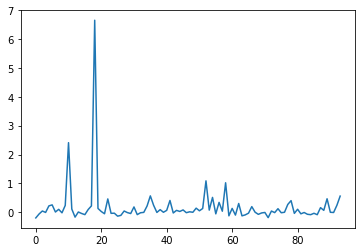

In [26]:
plt.plot(profit)

In [27]:
'''
controlled histories:
buying: 
15.12.2020
14.09.2020
20.07.2020

selling:


'''



'\ncontrolled histories:\nbuying: \n15.12.2020\n14.09.2020\n20.07.2020\n\nselling:\n\n\n'

In [28]:
df_daily.iloc[19]

min      5.520000
max      7.100000
close    6.090000
macd     0.150986
macds    0.193378
macdh   -0.042392
Name: 2012-01-19 00:00:00+00:00, dtype: float64

# Weekly MACD

In [29]:
# Close 

df_weekly = df[["Close"]]
df_weekly = df_Close.resample('W')[['Close']].last()

In [30]:
df_weekly

,Close
date,
2012-01-01 00:00:00+00:00,4.58
2012-01-08 00:00:00+00:00,6.90
2012-01-15 00:00:00+00:00,7.15
2012-01-22 00:00:00+00:00,6.28
2012-01-29 00:00:00+00:00,5.90
...,...
2020-12-06 00:00:00+00:00,19123.34
2020-12-13 00:00:00+00:00,19288.99
2020-12-20 00:00:00+00:00,23545.11


In [31]:
df_weekly = StockDataFrame.retype(df_weekly)
df_weekly['macd'] = df_weekly.get('macd') # calculate MACD

In [32]:
df_weekly = df_weekly[:-2]

In [33]:
buying = []
selling = []

i = 0

for x in range(len(df_weekly)-2):
    
        nextDayDate  = df_weekly.index[1 + i]
        nextDayMacd = df_weekly.iloc[1 + i]
        nextDayMacds = df_weekly.iloc[1 + i]
        print(nextDayDate)    
        
        if(df_weekly["macd"].iloc[i+1] < df_weekly["macds"].iloc[i+1]):
            if(df_weekly["macd"].iloc[i+2] > df_weekly["macds"].iloc[i+2]):
                print("burada alım yapılması lazım")
                buying.append([df_weekly.index[i+1],  df_weekly["close"].iloc[i+2]])
                
        if(df_weekly["macd"].iloc[i+1] > df_weekly["macds"].iloc[i+1]):
            if(df_weekly["macd"].iloc[i+2] < df_weekly["macds"].iloc[i+2]):
                print("burada satım yapılması lazım")
                selling.append([df_weekly.index[i+1],  df_weekly["close"].iloc[i+2]])
                
                
        
        i = i+1 

2012-01-08 00:00:00+00:00
2012-01-15 00:00:00+00:00
2012-01-22 00:00:00+00:00
burada satım yapılması lazım
2012-01-29 00:00:00+00:00
2012-02-05 00:00:00+00:00
2012-02-12 00:00:00+00:00
2012-02-19 00:00:00+00:00
2012-02-26 00:00:00+00:00
2012-03-04 00:00:00+00:00
2012-03-11 00:00:00+00:00
2012-03-18 00:00:00+00:00
2012-03-25 00:00:00+00:00
2012-04-01 00:00:00+00:00
2012-04-08 00:00:00+00:00
2012-04-15 00:00:00+00:00
burada alım yapılması lazım
2012-04-22 00:00:00+00:00
2012-04-29 00:00:00+00:00
2012-05-06 00:00:00+00:00
2012-05-13 00:00:00+00:00
2012-05-20 00:00:00+00:00
2012-05-27 00:00:00+00:00
2012-06-03 00:00:00+00:00
2012-06-10 00:00:00+00:00
2012-06-17 00:00:00+00:00
2012-06-24 00:00:00+00:00
2012-07-01 00:00:00+00:00
2012-07-08 00:00:00+00:00
2012-07-15 00:00:00+00:00
2012-07-22 00:00:00+00:00
2012-07-29 00:00:00+00:00
2012-08-05 00:00:00+00:00
2012-08-12 00:00:00+00:00
2012-08-19 00:00:00+00:00
2012-08-26 00:00:00+00:00
2012-09-02 00:00:00+00:00
2012-09-09 00:00:00+00:00
2012-09

In [34]:
len(buying)

15

In [35]:
len(selling)

15

In [36]:
selling

[[Timestamp('2012-01-22 00:00:00+0000', tz='UTC', freq='W-SUN'), 5.9],
 [Timestamp('2012-10-21 00:00:00+0000', tz='UTC', freq='W-SUN'), 10.5],
 [Timestamp('2013-06-09 00:00:00+0000', tz='UTC', freq='W-SUN'), 99.99],
 [Timestamp('2014-02-09 00:00:00+0000', tz='UTC', freq='W-SUN'), 629.77],
 [Timestamp('2014-08-03 00:00:00+0000', tz='UTC', freq='W-SUN'), 592.0],
 [Timestamp('2015-09-13 00:00:00+0000', tz='UTC', freq='W-SUN'), 230.95],
 [Timestamp('2016-01-31 00:00:00+0000', tz='UTC', freq='W-SUN'), 378.19],
 [Timestamp('2016-08-07 00:00:00+0000', tz='UTC', freq='W-SUN'), 570.52],
 [Timestamp('2017-03-26 00:00:00+0000', tz='UTC', freq='W-SUN'), 1074.2],
 [Timestamp('2018-01-28 00:00:00+0000', tz='UTC', freq='W-SUN'), 8619.85],
 [Timestamp('2018-09-02 00:00:00+0000', tz='UTC', freq='W-SUN'), 6371.29],
 [Timestamp('2018-11-11 00:00:00+0000', tz='UTC', freq='W-SUN'), 5532.52],
 [Timestamp('2019-08-25 00:00:00+0000', tz='UTC', freq='W-SUN'), 9585.29],
 [Timestamp('2020-03-08 00:00:00+0000', t

In [37]:
buying

[[Timestamp('2012-04-15 00:00:00+0000', tz='UTC', freq='W-SUN'), 5.21],
 [Timestamp('2012-12-02 00:00:00+0000', tz='UTC', freq='W-SUN'), 13.15],
 [Timestamp('2013-09-08 00:00:00+0000', tz='UTC', freq='W-SUN'), 125.21],
 [Timestamp('2014-06-15 00:00:00+0000', tz='UTC', freq='W-SUN'), 598.68],
 [Timestamp('2015-02-22 00:00:00+0000', tz='UTC', freq='W-SUN'), 248.39],
 [Timestamp('2015-10-04 00:00:00+0000', tz='UTC', freq='W-SUN'), 245.53],
 [Timestamp('2016-05-22 00:00:00+0000', tz='UTC', freq='W-SUN'), 519.93],
 [Timestamp('2016-10-30 00:00:00+0000', tz='UTC', freq='W-SUN'), 701.29],
 [Timestamp('2017-04-02 00:00:00+0000', tz='UTC', freq='W-SUN'), 1190.36],
 [Timestamp('2018-08-26 00:00:00+0000', tz='UTC', freq='W-SUN'), 7230.67],
 [Timestamp('2018-09-16 00:00:00+0000', tz='UTC', freq='W-SUN'), 6686.74],
 [Timestamp('2019-02-10 00:00:00+0000', tz='UTC', freq='W-SUN'), 3571.93],
 [Timestamp('2020-01-26 00:00:00+0000', tz='UTC', freq='W-SUN'), 9437.34],
 [Timestamp('2020-04-26 00:00:00+000

In [38]:
selling.pop(0)

[Timestamp('2012-01-22 00:00:00+0000', tz='UTC', freq='W-SUN'), 5.9]

In [39]:
buying.pop()

[Timestamp('2020-10-11 00:00:00+0000', tz='UTC', freq='W-SUN'), 11442.7]

In [40]:
profit_weekly =[] 
for b, s in zip(buying, selling):

    profit_weekly.append([s[0], ((s[1]/b[1]) - (b[1]/b[1]))])

In [41]:
profit_weekly

[[Timestamp('2012-10-21 00:00:00+0000', tz='UTC', freq='W-SUN'),
  1.0153550863723608],
 [Timestamp('2013-06-09 00:00:00+0000', tz='UTC', freq='W-SUN'),
  6.603802281368821],
 [Timestamp('2014-02-09 00:00:00+0000', tz='UTC', freq='W-SUN'),
  4.02971008705375],
 [Timestamp('2014-08-03 00:00:00+0000', tz='UTC', freq='W-SUN'),
  -0.011157880670809028],
 [Timestamp('2015-09-13 00:00:00+0000', tz='UTC', freq='W-SUN'),
  -0.07021216635130234],
 [Timestamp('2016-01-31 00:00:00+0000', tz='UTC', freq='W-SUN'),
  0.5403005742679101],
 [Timestamp('2016-08-07 00:00:00+0000', tz='UTC', freq='W-SUN'),
  0.09730155982536126],
 [Timestamp('2017-03-26 00:00:00+0000', tz='UTC', freq='W-SUN'),
  0.5317486346589857],
 [Timestamp('2018-01-28 00:00:00+0000', tz='UTC', freq='W-SUN'),
  6.241380758762056],
 [Timestamp('2018-09-02 00:00:00+0000', tz='UTC', freq='W-SUN'),
  -0.11885205658673403],
 [Timestamp('2018-11-11 00:00:00+0000', tz='UTC', freq='W-SUN'),
  -0.17261326146971456],
 [Timestamp('2019-08-25 00

In [44]:
sum(profit_weekly_df["profit"])

20.148988309724704

In [43]:
profit_weekly_df = pd.DataFrame(profit_weekly)
profit_weekly_df.columns =['date','profit']

In [78]:
profit_weekly_df

,date,profit
0,2012-10-21 00:00:00+00:00,1.01536
1,2013-06-09 00:00:00+00:00,6.6038
2,2014-02-09 00:00:00+00:00,4.02971
3,2014-08-03 00:00:00+00:00,-0.0111579
4,2015-09-13 00:00:00+00:00,-0.0702122
5,2016-01-31 00:00:00+00:00,0.540301
6,2016-08-07 00:00:00+00:00,0.0973016
7,2017-03-26 00:00:00+00:00,0.531749
8,2018-01-28 00:00:00+00:00,6.24138
9,2018-09-02 00:00:00+00:00,-0.118852


In [77]:
#Data file wasn't included last big trade. Thus we added it manually
profit_weekly_df = profit_weekly_df.append({"date":"2021-04-19 00:00:00+00:00","profit": "4.0833"}, ignore_index = True)

In [75]:
profit_weekly_df = profit_weekly_df[:-2]

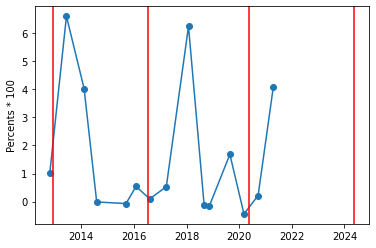

In [84]:
#Halving Dates
plt.plot("date","profit", data=profit_weekly_df, marker = 'o')
plt.ylabel("Percents * 100")
plt.axvline(x="2012-11-28", color='r')
plt.axvline(x="2016-07-09", color='r')
plt.axvline(x="2020-05-15", color='r')
plt.axvline(x="2024-05-15", color='r')

plt.show()

In [ ]:
## haftalık macd'ye bakmak günlük macd'ye bakmaktan daha verimli.

In [ ]:
# macd'lere haftalık olarak bakınca sonuç nasıl? 
# bir sonraki projede alımları sadece -macd'lerde satımları sadece -macd'lerde yaparsak sonuç nasıl değişiyor. 
# dönemlere bölme işlemini halving tarihlerine göre yap